#### **1. PROBLEM STATEMENT**

BrightPath Academy is currently facing several challenges related to the early identification of at-risk students. The goal is to proactively support learners by analyzing various factors such as academic performance, parental involvement, study habits, and demographic attributes. To achieve this, the Academy aims to develop a machine learning model that classifies students into GradeClass categories, enabling timely and targeted academic interventions.
<br>
<br>


#### **2. HYPOTHESIS** 

- **Hypothesis 1:** *Students with higher StudyTimeWeekly are more likely to achieve higher GradeClass*
<br>
<br>
- **Hypothesis 2:** *There is a positive correalation between ParentalSupport and Academic Performance*
<br>
<br>
- **Hypothesis 3:** *Students that are absent more frequently will have a lower GPA*
<br>
<br>


#### **3. GETTING THE SYSTEM READY**



In [261]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#### **4.1 LOADING AND THE DATA**

In [262]:
df = pd.read_csv("Student_performance_data.csv")
df.head(10)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


 #### **4.2 UNDERSTANDING THE DATA**

In [263]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [264]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

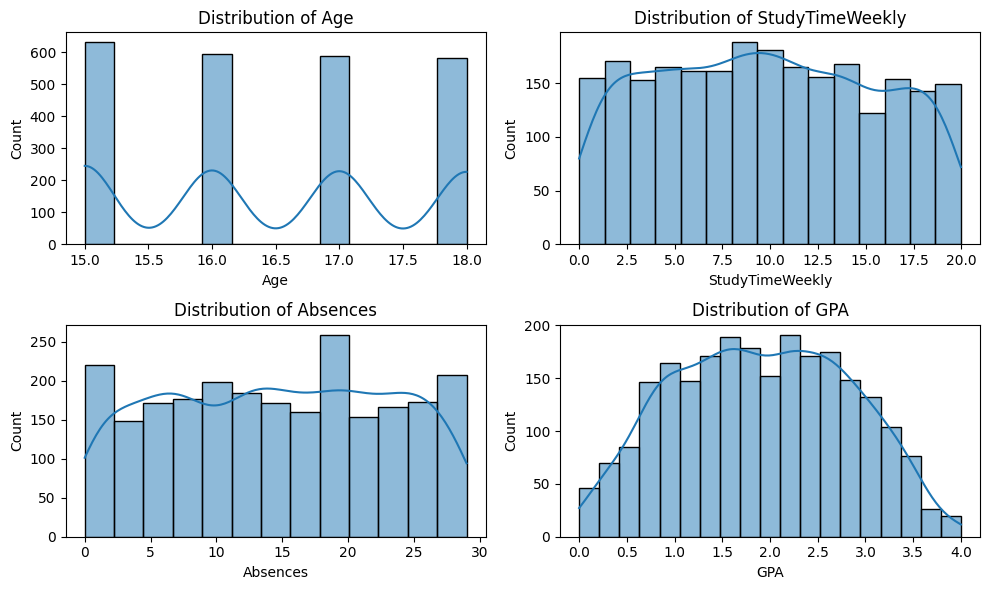

In [265]:
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

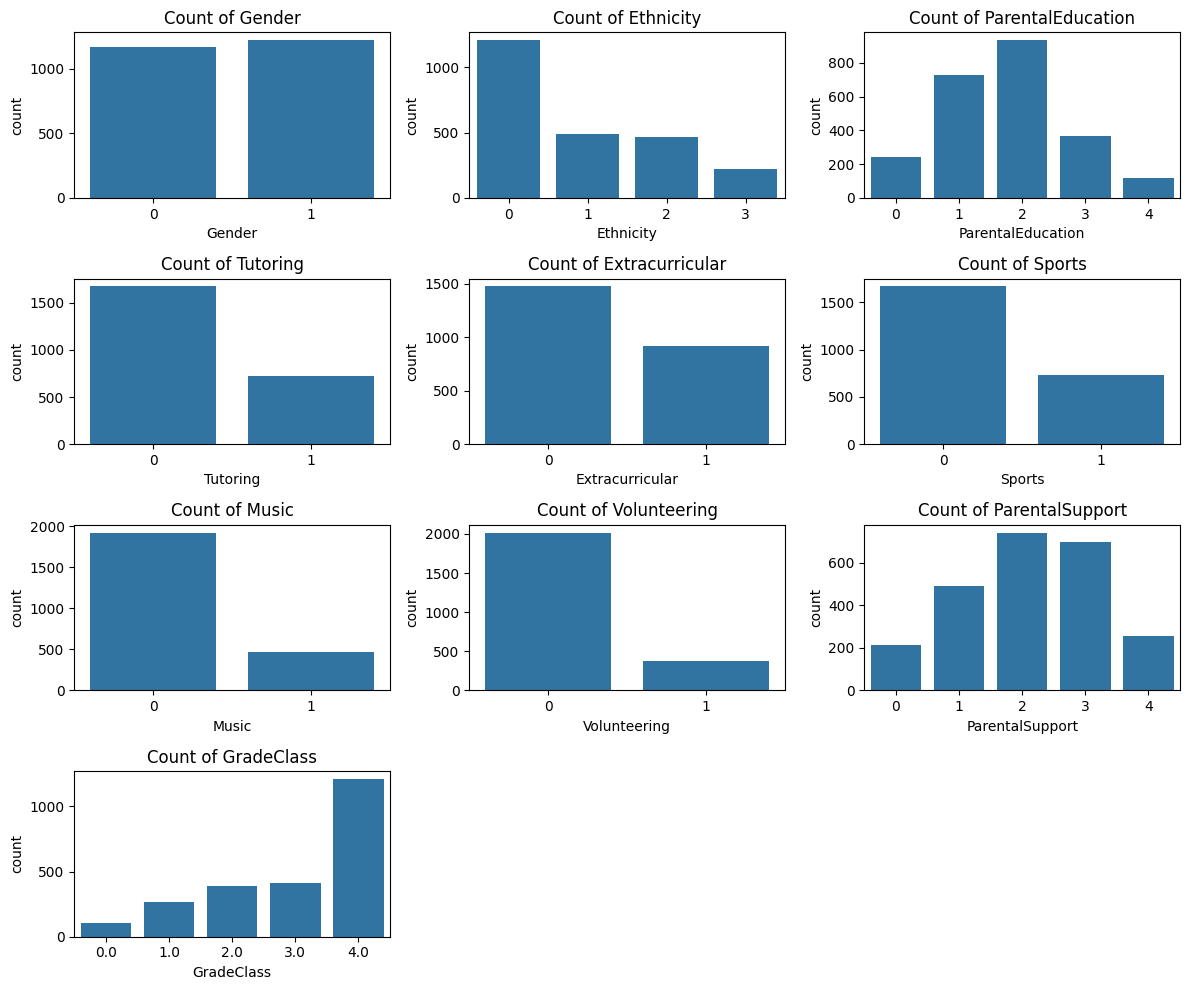

In [266]:
categorical_cols = ['Gender','Ethnicity','ParentalEducation','Tutoring','Extracurricular',
                    'Sports','Music','Volunteering','ParentalSupport','GradeClass']

plt.figure(figsize=(12,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(4,3,i+1)
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

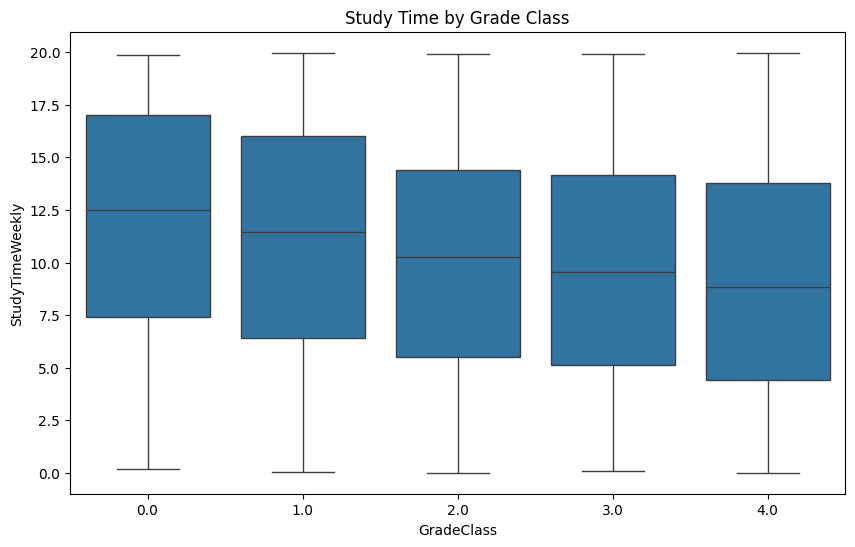

In [267]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title("Study Time by Grade Class")
plt.show()

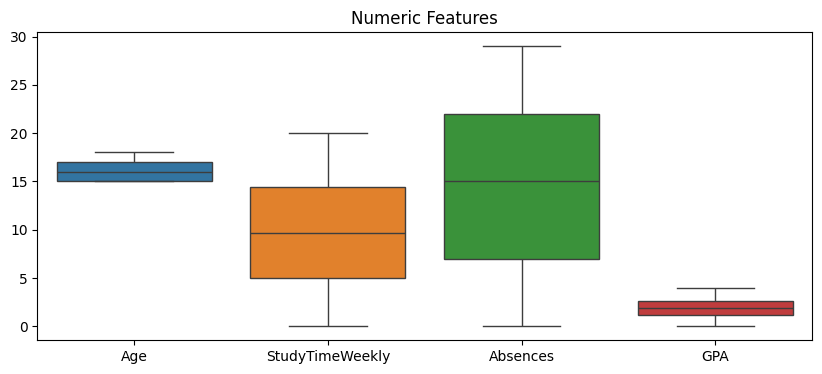

In [268]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[numerical_cols])
plt.title("Numeric Features")
plt.show()

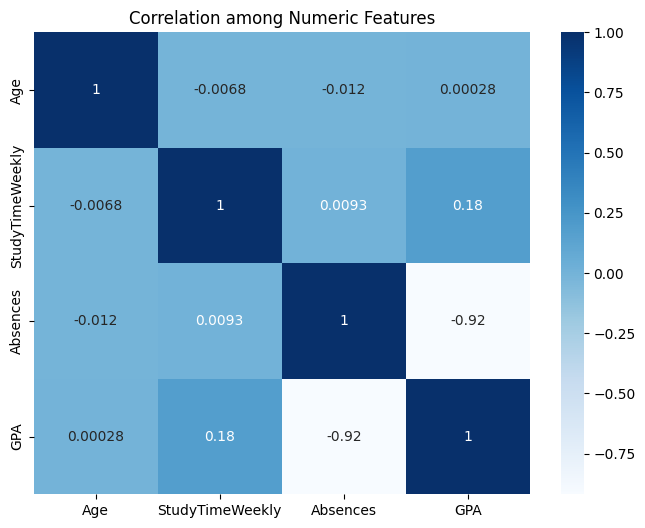

In [269]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation among Numeric Features")
plt.show()

#### **5. Exploratory Data Analysis**

##### **5.1 Univariate Analysis**

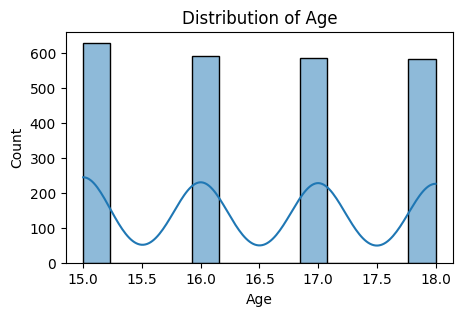

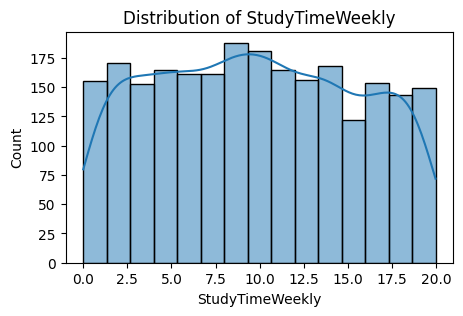

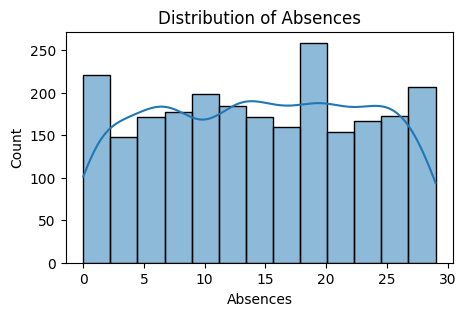

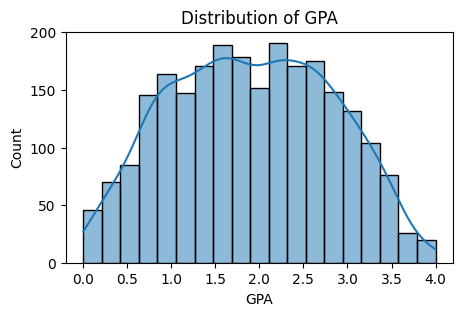

In [270]:
numeric_feats = ['Age','StudyTimeWeekly','Absences', 'GPA']
for col in numeric_feats:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

##### **5.2 Bivariate Analysis**

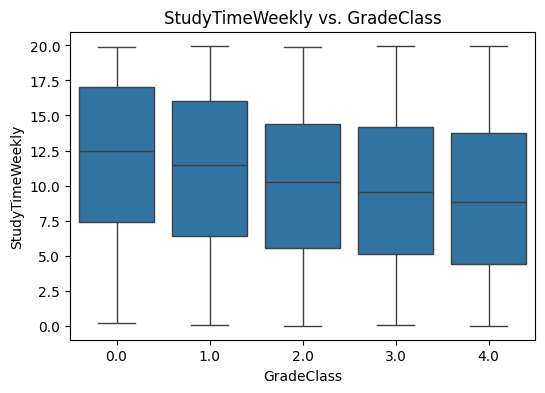

In [271]:
plt.figure(figsize=(6,4))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title("StudyTimeWeekly vs. GradeClass")
plt.show()

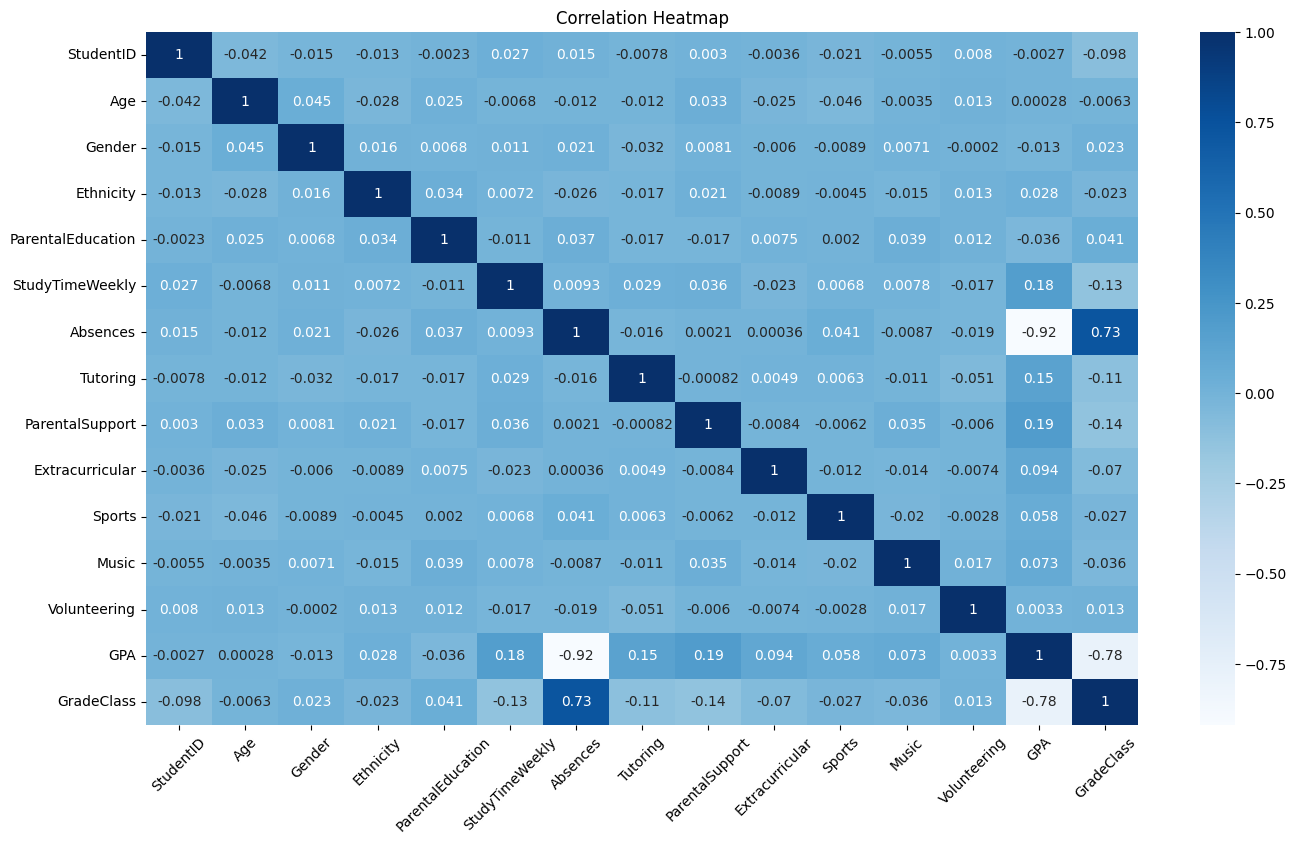

In [272]:
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

#### **6. Missing Value & Outlier Treatment**

## this is not needed, there is no null nor empty values in the df. can be helpful to show that we do know how we would have dealt with null values. 

In [273]:
# Fill numeric columns with median, except for binary columns which will use mode to avoid potentially getting 0.5 as the median: 

binary_columns = ['Gender', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in df.select_dtypes(include='number').columns:
    if col not in binary_columns:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Fill categorical columns with mode

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove GPA outliers using IQR

Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['GPA'] >= Q1 - 1.5 * IQR) & (df['GPA'] <= Q3 + 1.5 * IQR)]

# Check for remaining missing values

print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


#### **7. Evaluation Metrics for classification problem**

A list of the selected evaluation metrics: 

- **Accuracy**
<br>
    Accuracy is the proportion of correct predictions -  so both the true positives and the true negatives - out of the total predictions. It gives an overall sense of how many students' grades are correctly predicted in terms of the classification of GradeClass.
    <br>
    <br>
- **Precision**
<br>
    Precision measures the proportion of true positives - the correct predictions of a specific grade class. It basically determines how often the model is correct based on the number of correct predictions in proportion to the total number of predicitons. In our case it would ensure that predictions of the higher grade class are very accurate.
<br>
<br>
- **Recall**
<br>
    Recall measures the proportion of true positives out of all actual instances of a particular class. So it measures how well the machine learning model identified all the students in a specific class. It makes sure that no one misses out on getting help by identifying the students who are falling behind.
<br>
<br>
- **F1-Score**
<br>
    The F1-score is the harmonic mean of precision and recall, providing a single metric that balances the trade-off between them. This is useful when false positives and false negatives are equally important.
<br>


#### **8. Feature Engineering**

In [274]:
df.drop('GPA', axis=1, inplace=True)

Since GradeClass is obtained from GPA, we removed it from the feature set to avoid direct leakage of GradeClass.

In [275]:
df['TotalExtracurricular'] = (df['Sports'] + df['Music'] + df['Volunteering'])

If a student is doing multiple extracurricular activities then their grades could be affected by it in terms of the amount of study time that they have left.

In [276]:
df['ParentalEduSupport'] = df['ParentalEducation'] * df['ParentalSupport']

Interaction Between Parental Education & Parental Support could significantly influence a students performance. By adding the ParentalEducation and ParentalSupport fields we can see what additional academical support each student potentially has.

In [277]:
df = pd.get_dummies(df, columns=['Ethnicity'], prefix='Ethnicity')

Applying One-Hot Encoding to the Ethnicity field to replace categorical data with numeric data

In [ ]:
df.drop('StudentID', axis=1, inplace=True)
df.drop('Extracurricular', axis=1, inplace=True)


Removing non-predictive fields form the data frame, these are unnecessary within training the model.  

#### **9. Model Building: Part 1**

#### **10. Model building: Part 2**

#### **11. Model deployment**